In [347]:
import random as rand
import sys
import copy

global CNT
global WAR
CNT = 0
WAR = 0

class Deck:
    def __init__(self):
        self.cards = []

    def draw_card(self) -> int:
        temp = 0
        try:
            temp = self.cards.pop(0)
        except IndexError:
            pass
        return temp
    
    def add_cards(self, cards : list) -> None:
        while cards:
            idx = rand.randint(0, len(cards) - 1)
            self.cards.append(cards.pop(idx))

    def get_num_cards(self):
        return len(self.cards)

def play_round(player_1 : Deck, player_2 : Deck, table : list = []):
    # print(table)
    # print("Player_1 deck: {}".format(player_1.cards))
    # print("Player_2 deck: {}".format(player_2.cards))    
    p1 = player_1.draw_card()
    p2 = player_2.draw_card()
    # print("Player 1 card: {}".format(p1))
    # print("Player 2 card: {}".format(p2))
    if p1 == 0:
        player_2.add_cards([p2])
        if table:
            player_2.add_cards(table)
        return game_end(2)

    elif p2 == 0:
        player_1.add_cards([p1])
        if table:
            player_1.add_cards(table)
        return game_end(1)
    table.append(p1)
    table.append(p2)
    # print(table)
    res = p1 - p2
    if res < 0:
        player_2.add_cards(table)
        # print("Player 2 wins the round")
    elif res == 0:
        global WAR
        WAR += 1
        num_p1 = player_1.get_num_cards()
        num_p2 = player_2.get_num_cards()
        if num_p1 < 2:
            return game_end(1)     
        elif num_p2 < 2:
            return game_end(2)
        else:
            war_card_1 = player_1.draw_card()
            war_card_2 = player_2.draw_card()
            table.append(war_card_1)
            table.append(war_card_2)
            # print("War card p1: {}".format(war_card_1))
            # print("War card p2: {}".format(war_card_2))
            play_round(player_1, player_2, table)

    else:
        player_1.add_cards(table)
        # print("Player 1 wins the round")
    global CNT
    CNT += 1
    return 0, 0 

def game_end(player : int) -> None:
    print("Player {player} wins".format(player = player))
    print("Rounds: {rounds}".format(rounds = CNT))
    print("Wars: {wars}".format(wars = WAR))
    return CNT, WAR

def shuffle_cards(player_1 : Deck, player_2 : Deck, deck : list):
    if len(deck) % 2 != 0:
        print("Nieparzysta liczba kard, wydupcaj!")
        sys.exit()
    deck_cpy = copy.deepcopy(deck)
    while deck:
        idx = rand.randint(0, len(deck) - 1)
        player_1.add_cards([deck.pop(idx)])
        idx2 = rand.randint(0, len(deck) - 1)
        player_2.add_cards([deck.pop(idx2)])
    return deck_cpy

def play_game(p1, p2):
    rounds = 0
    wars = 0
    while not rounds and not wars:
        rounds, wars = play_round(p1, p2, [])
        leak = len(p1.cards) + len(p2.cards)
        # if leak != 4 * 13:
        #     print("Cards leaked")
        #     print("Player_1 deck: {}".format(p1.cards))
        #     print("Player_2 deck: {}".format(p2.cards))    
        #     break
    return rounds, wars

In [351]:
deck = [2,2,2,2,
        3,3,3,3,
        4,4,4,4,
        5,5,5,5,
        6,6,6,6,
        7,7,7,7,
        8,8,8,8,
        9,9,9,9,
        10,10,10,10,
        11,11,11,11,
        12,12,12,12,
        13,13,13,13,
        14,14,14,14]

rd = []
wr = []
for i in range(1000):
   CNT = 0
   WAR = 0
   p1 = Deck()
   p2 = Deck()
   deck = shuffle_cards(p1, p2, deck)
   one_rd, one_wr = play_game(p1, p2) 
   rd.append(one_rd)
   wr.append(one_wr)

Player 1 wins
Rounds: 494
Wars: 24
Player 1 wins
Rounds: 199
Wars: 13
Player 2 wins
Rounds: 687
Wars: 41
Player 1 wins
Rounds: 156
Wars: 8
Player 2 wins
Rounds: 269
Wars: 15
Player 1 wins
Rounds: 869
Wars: 41
Player 2 wins
Rounds: 271
Wars: 19
Player 2 wins
Rounds: 178
Wars: 12
Player 1 wins
Rounds: 1242
Wars: 74
Player 2 wins
Rounds: 1133
Wars: 57
Player 1 wins
Rounds: 263
Wars: 30
Player 1 wins
Rounds: 928
Wars: 44
Player 2 wins
Rounds: 1482
Wars: 70
Player 2 wins
Rounds: 225
Wars: 19
Player 2 wins
Rounds: 167
Wars: 15
Player 1 wins
Rounds: 405
Wars: 25
Player 1 wins
Rounds: 741
Wars: 42
Player 1 wins
Rounds: 202
Wars: 12
Player 2 wins
Rounds: 245
Wars: 12
Player 1 wins
Rounds: 988
Wars: 58
Player 1 wins
Rounds: 286
Wars: 16
Player 2 wins
Rounds: 392
Wars: 24
Player 1 wins
Rounds: 88
Wars: 5
Player 2 wins
Rounds: 190
Wars: 10
Player 1 wins
Rounds: 433
Wars: 23
Player 2 wins
Rounds: 60
Wars: 6
Player 1 wins
Rounds: 333
Wars: 21
Player 2 wins
Rounds: 1620
Wars: 88
Player 2 wins
Rounds:

[494, 199, 687, 156, 269, 869, 271, 178, 1242, 1133, 263, 928, 1482, 225, 167, 405, 741, 202, 245, 988, 286, 392, 88, 190, 433, 60, 333, 1620, 863, 537, 155, 658, 864, 415, 852, 223, 270, 250, 213, 623, 239, 586, 471, 883, 258, 547, 207, 167, 289, 862, 648, 232, 475, 581, 439, 360, 487, 91, 288, 670, 363, 314, 193, 181, 476, 281, 1130, 231, 53, 122, 749, 947, 365, 2478, 601, 846, 685, 2117, 150, 384, 850, 353, 156, 728, 114, 478, 641, 247, 689, 520, 127, 330, 391, 403, 104, 196, 711, 312, 895, 995, 190, 167, 123, 841, 404, 485, 541, 238, 1078, 481, 668, 771, 192, 50, 654, 240, 171, 150, 278, 525, 232, 395, 169, 170, 303, 135, 417, 49, 676, 262, 193, 424, 415, 1042, 305, 161, 139, 661, 185, 1358, 233, 1224, 1034, 192, 1320, 466, 1002, 300, 282, 300, 315, 173, 182, 411, 763, 258, 167, 237, 117, 905, 280, 474, 166, 1871, 454, 824, 124, 432, 876, 79, 394, 795, 582, 281, 700, 1328, 1148, 426, 304, 598, 1425, 1757, 971, 701, 136, 632, 123, 976, 755, 272, 1206, 432, 866, 64, 1083, 323, 85, 11

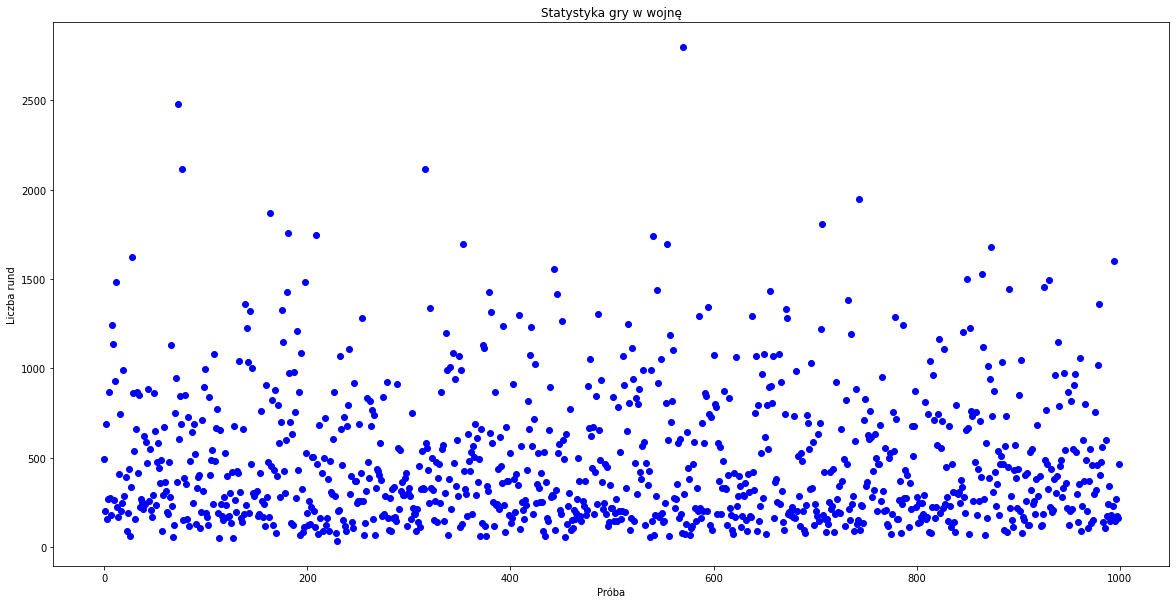

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(rd, 'bo')
plt.xlabel("Próba")
plt.ylabel("Liczba rund")
plt.title("Statystyka gry w wojnę")
plt.show()